<a href="https://colab.research.google.com/github/kim-kidong/hello-world/blob/master/gg_62_MNIST_keras_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0916_MNIST-keras
- 케라스를 이용한 MNIST

## 데이터 로드

In [0]:
from keras.datasets import mnist
from keras.utils import to_categorical

In [0]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [21]:
train_labels[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

## MNIST 이미지 확인 및 데이터 전처리

<function matplotlib.pyplot.show>

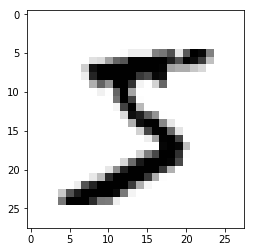

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline #현재 화면에 출력 명령어

plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.show

In [42]:
import numpy as np
x = np.arange(4*4*3*5) ;x

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [43]:
x.reshape(-1,4,4,3)

array([[[[  0,   1,   2],
         [  3,   4,   5],
         [  6,   7,   8],
         [  9,  10,  11]],

        [[ 12,  13,  14],
         [ 15,  16,  17],
         [ 18,  19,  20],
         [ 21,  22,  23]],

        [[ 24,  25,  26],
         [ 27,  28,  29],
         [ 30,  31,  32],
         [ 33,  34,  35]],

        [[ 36,  37,  38],
         [ 39,  40,  41],
         [ 42,  43,  44],
         [ 45,  46,  47]]],


       [[[ 48,  49,  50],
         [ 51,  52,  53],
         [ 54,  55,  56],
         [ 57,  58,  59]],

        [[ 60,  61,  62],
         [ 63,  64,  65],
         [ 66,  67,  68],
         [ 69,  70,  71]],

        [[ 72,  73,  74],
         [ 75,  76,  77],
         [ 78,  79,  80],
         [ 81,  82,  83]],

        [[ 84,  85,  86],
         [ 87,  88,  89],
         [ 90,  91,  92],
         [ 93,  94,  95]]],


       [[[ 96,  97,  98],
         [ 99, 100, 101],
         [102, 103, 104],
         [105, 106, 107]],

        [[108, 109, 110],
         [111, 1

In [0]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32')/255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

## MLP 로 구현(케라스 사용)

In [5]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Dense(100, activation='relu', input_shape = (28, 28, 1)))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

model.summary()




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 28, 28, 100)       200       
_________________________________________________________________
dense_2 (Dense)              (None, 28, 28, 100)       10100     
_________________________________________________________________
flatten_1 (Flatten)          (None, 78400)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                784010    
Total params: 794,310
Trainable params: 794,310
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer= 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [7]:
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/5
60000/60000 [==============================] - 13s 212us/step - loss: 0.3520 - acc: 0.8987
Epoch 2/5
60000/60000 [==============================] - 8s 138us/step - loss: 0.2893 - acc: 0.9187
Epoch 3/5
60000/60000 [==============================] - 8s 136us/step - loss: 0.2708 - acc: 0.9243
Epoch 4/5
60000/60000 [==============================] - 8s 136us/step - loss: 0.2516 - acc: 0.9304
Epoch 5/5
60000/60000 [==============================] - 8s 138us/step - loss: 0.2316 - acc: 0.9351


In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc = ',test_acc)

10000/10000 [==============================] - 1s 95us/step
test_acc =  0.927


## CNN 모델 생성

In [9]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape = (28, 28, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

model.summary()   


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)              

## 훈련

In [0]:
model.compile(optimizer= 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [11]:
model.fit(train_images, train_labels, epochs=3, batch_size=64)

Epoch 1/3
60000/60000 [==============================] - 8s 126us/step - loss: 0.1776 - acc: 0.9447
Epoch 2/3
60000/60000 [==============================] - 4s 69us/step - loss: 0.0503 - acc: 0.9842
Epoch 3/3
60000/60000 [==============================] - 4s 68us/step - loss: 0.0349 - acc: 0.9892


In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc = ',test_acc)

10000/10000 [==============================] - 1s 61us/step
test_acc =  0.9892
